In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg

In [4]:
rmg = .7
rsg = .8
rms = .9

rho_mg_s = (rmg - rsg*rms) / ( np.sqrt(1-rsg**2)*np.sqrt(1-rms**2) )
rho_sg_m = (rsg - rmg*rms) / ( np.sqrt(1-rmg**2)*np.sqrt(1-rms**2) )

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [13]:
N = 76

x1 = np.linspace(1,10,N) + np.random.randn(N)
x2 = x1 + np.random.randn(N)
x3 = x1 + np.random.randn(N)

df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

cormatR = df.corr()
print(cormatR)

print(' ')
print(cormatR.values[1,0])

pc = pg.partial_corr(df,x='x3',y='x2',covar='x1')
print(' ')
print(pc)

          x1        x2        x3
x1  1.000000  0.938899  0.934546
x2  0.938899  1.000000  0.860599
x3  0.934546  0.860599  1.000000
 
0.9388987987756994
 
          n         r          CI95%     p-val
pearson  76 -0.137534  [-0.35, 0.09]  0.239324


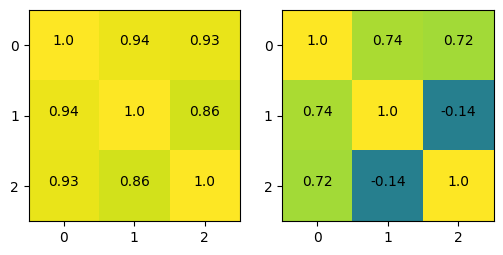

In [14]:
fig,ax = plt.subplots(1,2,figsize=(6,3))

ax[0].imshow(cormatR.values,vmin=-1,vmax=1)
ax[0].set_xticks(range(3))
ax[0].set_yticks(range(3))

for i in range(3):
    for j in range(3):
        ax[0].text(i,j,np.round(cormatR.values[i,j],2), horizontalalignment='center')
        
partialCorMat = df.pcorr()
ax[1].imshow(partialCorMat.values,vmin=-1,vmax=1)
ax[1].set_xticks(range(3))
ax[1].set_yticks(range(3))

for i in range(3):
    for j in range(3):
        ax[1].text(i,j,np.round(partialCorMat.values[i,j],2), horizontalalignment='center')


plt.show()